In [191]:
import math
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [192]:
def import_and_clean_data(path):
    data_inputs = list(map(lambda x: x.strip().split("\t"), open(f"./9/{path}", "r")))
    data = []
    for idx, datum in enumerate(data_inputs):
        if idx == 0 or idx == 1:
            continue
        else:
            data.append([])
            for val in datum:
                data[idx-2].append(float(val))
    
    data = np.array(data)
    return np.array(data)

data = import_and_clean_data("txy_9_1.csv")

In [199]:
def plot(x_data, y_data, title="Plot"):
    plt.plot(x_data, y_data)  
    plt.title('Plot')  
    plt.ylabel('speed')
    plt.xlabel('time')
    plt.draw()  
    plt.show()  


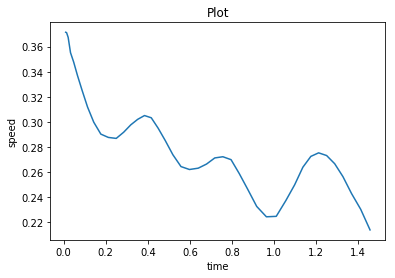

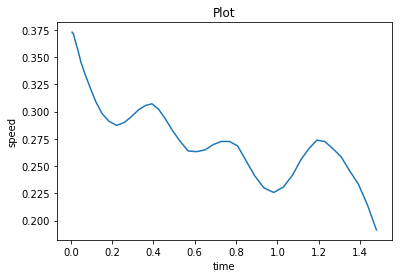

In [194]:
files = []
for i in range(1, 3):
    files.append(import_and_clean_data(f"txy_9_{i}.csv"))
    
for file in files:
    # Plots y distance over time
    # 0 is time, 1 is x, and 2 is y
    plot(file[:,1], file[:,2])

In [195]:
def get_speed(data):
    prev_t = -1e-10
    prev_xy = [data[0][1], data[0][2]]
    speeds = []
    for idx, datum in enumerate(data):
        #print(datum)
        speed = math.sqrt((datum[1] - prev_xy[0])**2 + (datum[2] - prev_xy[1])**2) / (datum[0] - prev_t)
        speeds.append(speed)
        #print(speed)
        prev_t = datum[0]
        prev_xy = [datum[1], datum[2]]
    speeds = np.array(speeds)
    return speeds

speeds = get_speed(data)

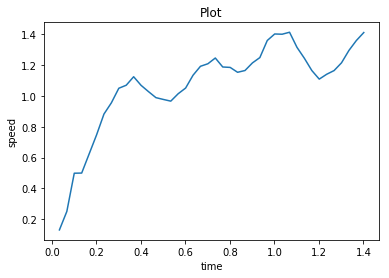

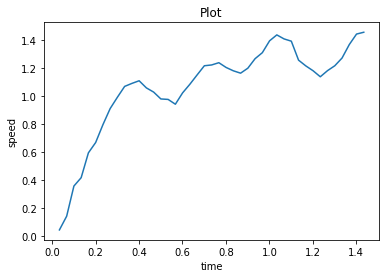

In [209]:

speeds = []
for file in files:
    speed = get_speed(file)
    speeds.append(speed)
    plot(file[1:,0], speed[1:])

#plot(data[1:,0], speeds[1:])